<a href="https://colab.research.google.com/github/Ivanpillow/Clasificacion-Inteligente-de-Datos/blob/main/Hands-on%201%3A%20Percepton%20Notebook%20(Tutorial)%20/Hans_on_1_PerceptronNotebook_DIHM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hans-On 1 Perceptron Notebook

Nombre: Diego Iván Hernández Muñoz

Profesor: Jose Antonio Aviña Mendez

Materia: Clasificacion inteligente de datos

# Fundamentos del clasificador lineal Perceptrón

A grandes rasgos el perceptrón es una neurona artificial, fundamental para las redes neuronales dentro del Deep Learning.

De manera más especifica esta unidad de red neuronal es un algoritmo para el aprendizaje supervisado de clasificadores binarios. Este algoritmo permite que las neuronas artificiales aprendan y traten los elementos de una serie de datos.

De manera breve su regla de aprendizaje se trata de enseñar automaticamente los coeficientes de peso óptimos. Donde el perceptrón recibe múltiples señales de entrada. Si la suma de las señales supera un umbral determinado, se produce una señal o, por el contrario, no se emite ningún resultado.

# Modelo matemático del Perceptrón

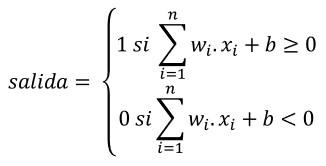

​Básicamente esta formula general se expresa así:

xi: es el valor de entrada.

wi: pesos asociados a cada entrada.

b: bias, este valor se ajusta al umbral de decisión.

Sumatoria de xi y wi: suma ponderada de las entradas.

#### Visualmente se explica de la siguiente manera:

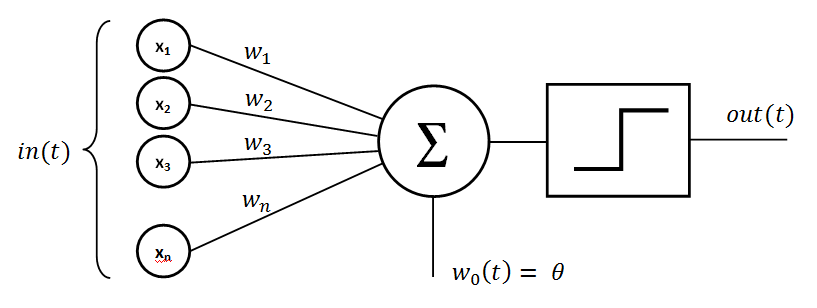

Ese valor puede ser positivo o negativo. La neurona artificial se activa si el valor es positivo. Solo se activa si el peso calculado de los datos de entrada supera un umbral determinado.

El resultado predicho se compara con el resultado conocido. En caso de diferencia, el error se retropropaga para permitir ajustar los pesos.

# Descripción de librerias

In [ ]:
import numpy as np # Con esta manejaré matrices y realizaré operaciones vectoriales
from sklearn.datasets import load_wine # Dataset que usaré de ejemplo es de vines
from sklearn.linear_model import Perceptron # Se importa la clase con sklearn para el modelo específico del perceptrón
from sklearn.model_selection import train_test_split  # Para divir los conjuntos de datos en entrenamiento y prueba
from sklearn.metrics import accuracy_score # Para calcular la Métrica Accuracy

# Pipeline

## Feature Engineering

Se carga el dataset en la variable wine.

En la X son las entradas o debido al dataset serían caracteristicas del vino.

La Y representa la salida o clase del vino (0 = tipo A, 1 = tipo B).

In [ ]:
wine = load_wine()
X = wine.data
y = wine.target

# Lo simplifiqué en dos clases (0 y 1) y dos características
X = X[y != 2, :2] # Características: 'alcohol' y 'malic_acid'
y = y[y != 2] # Clases 0 y 1

## Model Selection

Al ser un modelo lineal simple, es capaz de aprender una frontera de decisión lineal y por ello funciona bien cuando los datos son aproximadamente separables.

Además de ser bueno por el entrenamiento es rápido y fácil de interpretar con el ajuste de pesos + bias.

## Model Training

In [ ]:
# Los datos estan divididos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Ahora se crea el modelo del perceptrón
perceptron = Perceptron(max_iter=1000, eta0=0.1, random_state=42)

# Y se entrena el modelo con la función fit
perceptron.fit(X_train, y_train)

Perceptron(eta0=0.1, random_state=42)

## Prediction

La variable predict(X) devuelve la clase estimada por el modelo para cada muestra y se imprime una comparación entre la clase predicha y la clase real, verificando si el Perceptrón clasificó correctamente los patrones.

In [ ]:
# Con esta función se verifican las predicciones del modelo
def probar_patrones(modelo, X, y):
    predicciones = modelo.predict(X)
    for i in range(len(X)):
        print(f"Variables: {X[i]} | Prediccion: {predicciones[i]} | Clase real: {y[i]}")
    return predicciones

# Probar sobre los datos de prueba
print("\nResultados de clasificacion:")
y_pred = probar_patrones(perceptron, X_test, y_test)


Resultados de clasificacion:
Variables: [13.56  1.73] | Prediccion: 0 | Clase real: 0
Variables: [13.56  1.71] | Prediccion: 0 | Clase real: 0
Variables: [13.64  3.1 ] | Prediccion: 0 | Clase real: 0
Variables: [13.58  1.66] | Prediccion: 0 | Clase real: 0
Variables: [11.03  1.51] | Prediccion: 0 | Clase real: 1
Variables: [14.22  1.7 ] | Prediccion: 0 | Clase real: 0
Variables: [12.21  1.19] | Prediccion: 0 | Clase real: 1
Variables: [12.42  2.55] | Prediccion: 0 | Clase real: 1
Variables: [12.72  1.81] | Prediccion: 0 | Clase real: 1
Variables: [13.39  1.77] | Prediccion: 0 | Clase real: 0
Variables: [12.47  1.52] | Prediccion: 0 | Clase real: 1
Variables: [13.3   1.72] | Prediccion: 0 | Clase real: 0
Variables: [12.17  1.45] | Prediccion: 0 | Clase real: 1
Variables: [13.24  2.59] | Prediccion: 0 | Clase real: 0
Variables: [12.29  1.41] | Prediccion: 0 | Clase real: 1
Variables: [12.08  2.08] | Prediccion: 0 | Clase real: 1
Variables: [13.28  1.64] | Prediccion: 0 | Clase real: 0
V

## Model Evaluation

Ahora com ose indicar, con "accuracy" mide el porcentaje de predicciones correctas

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecision (Accuracy) del Perceptron: {accuracy:.2f}")

# Mostrar los pesos y el bias aprendidos
print(f"Pesos (coeficientes): {perceptron.coef_}")
print(f"Bias (intercepción): {perceptron.intercept_}")


Precision (Accuracy) del Perceptron: 0.51
Pesos (coeficientes): [[-0.99   1.942]]
Bias (intercepción): [2.1]


# Bibliografía

Formulación matemática del Perceptrón | Interactive Chaos. (2025). Interactivechaos.com. https://interactivechaos.com/es/manual/tutorial-de-machine-learning/formulacion-matematica-del-perceptron

‌

rédac, T. (2022, March 7). Perceptron : qu’est-ce que c’est et à quoi ça sert ? Formation Data Science | DataScientest.com. https://datascientest.com/es/perceptron-que-es-y-para-que-sirve

‌